In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd

import numpy as np
%matplotlib inline

In [18]:
from utils.dataManagers.steward import DataSteward
from utils.dataManagers.informations import informer

ds = DataSteward('mapper_and_most_frequent', 'mean')
train = ds.train_data
test = ds.test_data
y_train = ds.train_response

In [19]:
df = train.join(y_train)
df.iloc[310:315]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OverallQual,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
311,70.049958,7685.0,1993.0,1994.0,112.0,518.0,0.0,179.0,697.0,697.0,...,Above Average,Paved,No Pool,Standard (Composite) Shingle,Gable,Normal Sale,WD,Paved,"All public Utilities (E,G,W,& S)",165600.0
312,50.000000,8000.0,1948.0,2002.0,0.0,680.0,0.0,292.0,972.0,972.0,...,Above Average,Paved,No Pool,Standard (Composite) Shingle,Gable,Normal Sale,WD,Paved,"All public Utilities (E,G,W,& S)",132000.0
313,65.000000,7800.0,1939.0,1950.0,0.0,507.0,0.0,286.0,793.0,793.0,...,Average,Paved,No Pool,Standard (Composite) Shingle,Gable,Normal Sale,WD,Paved,"All public Utilities (E,G,W,& S)",119900.0
314,150.000000,215245.0,1965.0,1965.0,0.0,1236.0,820.0,80.0,2136.0,2036.0,...,Good,Paved,No Pool,Standard (Composite) Shingle,Hip,Normal Sale,WD,Paved,"All public Utilities (E,G,W,& S)",375000.0
315,60.000000,9600.0,1925.0,1990.0,0.0,16.0,0.0,712.0,728.0,832.0,...,Good,Paved,No Pool,Standard (Composite) Shingle,Gable,Normal Sale,WD,Paved,"All public Utilities (E,G,W,& S)",178000.0


In [23]:
np.log(df.LotArea).describe()

count    1460.000000
mean        9.110838
std         0.517448
min         7.170120
25%         8.929766
50%         9.156781
75%         9.358890
max        12.279532
Name: LotArea, dtype: float64

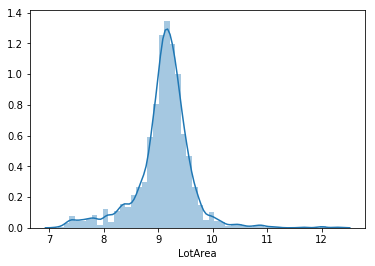

In [22]:
sns.distplot(np.log(df.LotArea))

In [ ]:
df['sqrftcost'] = df.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

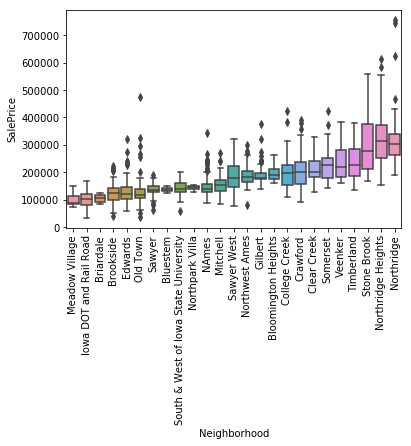

In [60]:
neighborhood_mean_price = list(df.groupby('Neighborhood').SalePrice.mean().sort_values().index)
g =sns.boxplot(y=df.SalePrice, x=df.Neighborhood, order = neighborhood_mean_price)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

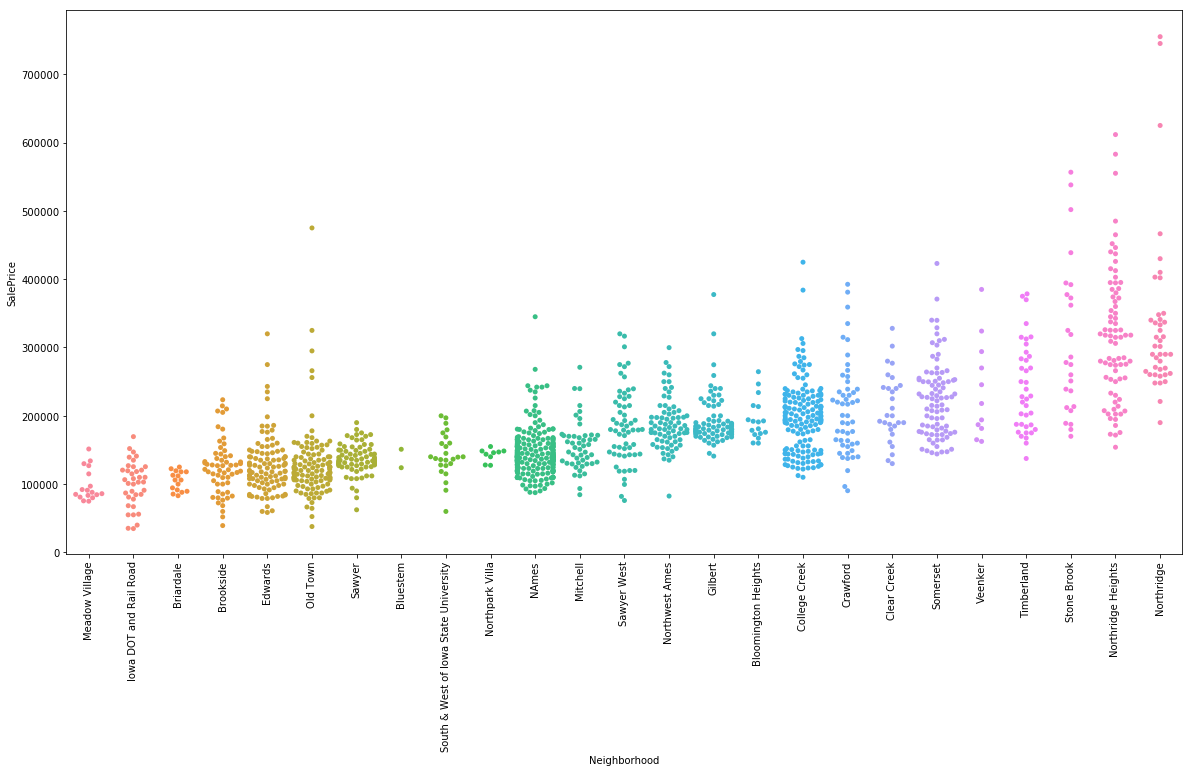

In [86]:
fig, ax = plt.subplots(figsize=[20,10])
sns.swarmplot(x=df.Neighborhood, y=df.SalePrice, order=neighborhood_mean_price, ax = ax)
# sns.violinplot(x=df.Neighborhood, y=df.SalePrice, order=neighborhood_mean_price, ax = ax)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

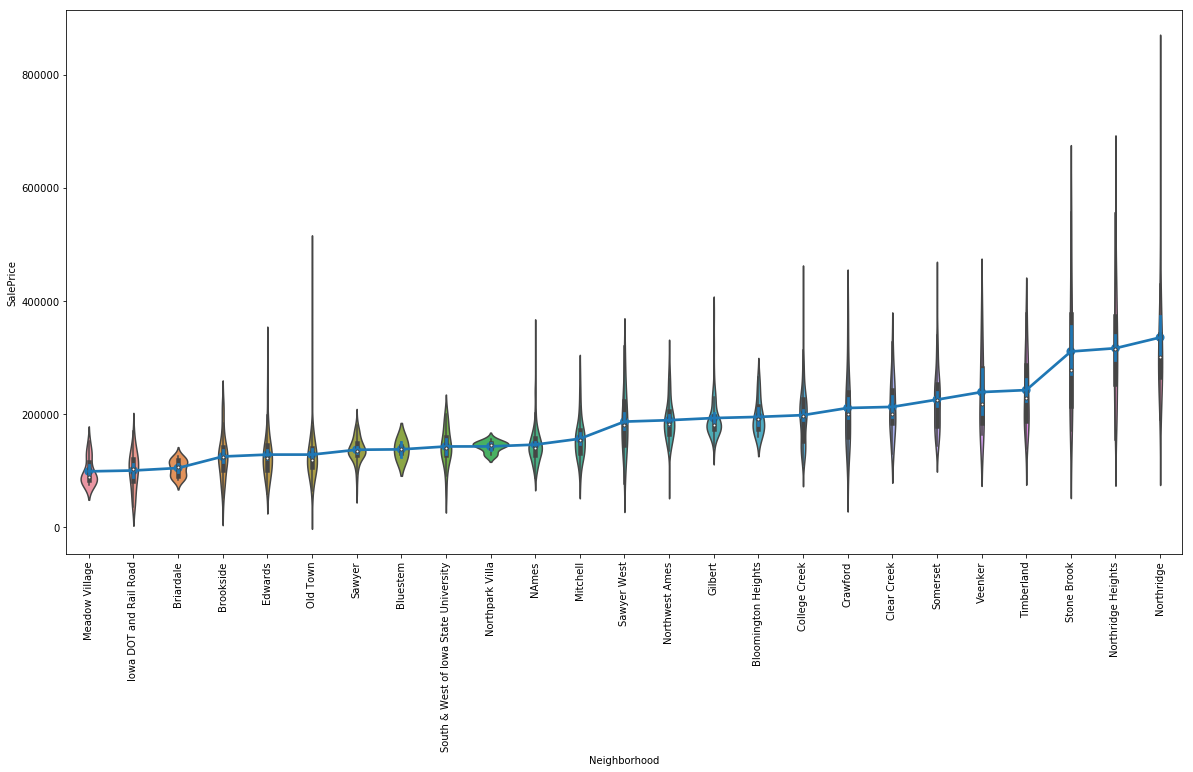

In [92]:
fig, ax = plt.subplots(figsize=[20,10])
sns.violinplot(x=df.Neighborhood, y=df.SalePrice, order=neighborhood_mean_price, ax = ax)
sns.pointplot(x=df.Neighborhood, y=df.SalePrice, order=neighborhood_mean_price)
plt.xticks(rotation=90)

# do this sales prive vs Neighborhood but with price per meter

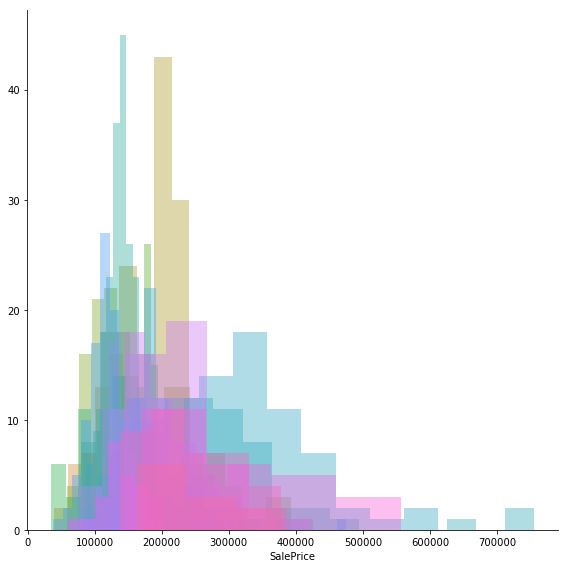

In [40]:
g = sns.FacetGrid(df, hue='Neighborhood', size=8)
g =g.map(sns.distplot, 'SalePrice', kde=False)


In [ ]:
na logike:
    lokalizacja
        Neighborhood
    wielkosc
    ilosc lazienek
    ilosc kuchni
    garaz
    basen
    ogrzewanie
    wysokosc
    piwnica
    jakosc wykonania
        typ mieszkania (mssubclas)
    Utilities
    okolica (odleglosc od ulicy np.)
    
sprobowac wziac log z danych > 0
sproboj zestandaryzowac dane

use regression with lasso and choose parameters

najlepiej jest jezeli zmienne nie sa ze soba skorelowane ale mocno skorelowane z tym co chcemy przewidziec!

ewaluacja algorytmu:
    coefficient plot


In [ ]:
This is weird- maby lot area is not only one? search for square feet and try to add them together.

ground living space (GR LIVE AREA) or total square footage (TOTAL BSMT SF + GR LIV AREA). 

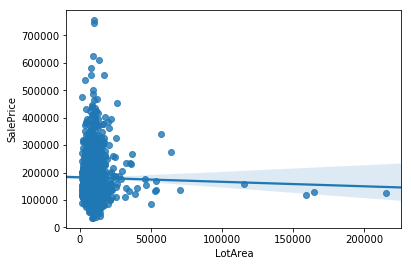

In [20]:
sns.regplot(df.LotArea, df.SalePrice.sort_values())

In [10]:
train.LotArea.idxmax()

314

In [135]:
sq_meters = (train.LotArea * 0.09290304)

314.0

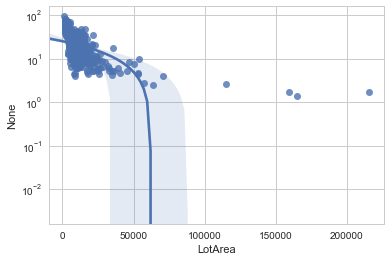

In [150]:
sns.regplot(x=train.LotArea, y=y_train / train.LotArea)
plt.yscale('log')

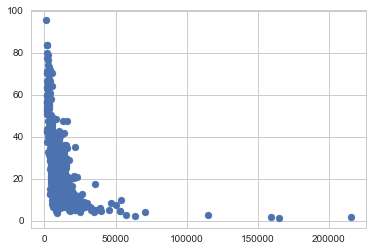

In [148]:
plt.scatter(x=train.LotArea, y=y_train / train.LotArea)

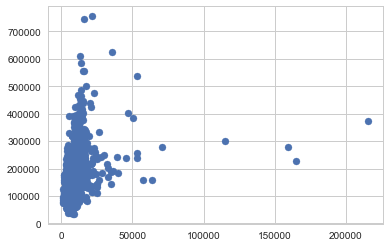

In [126]:
plt.scatter(x=train.LotArea, y=y_train)

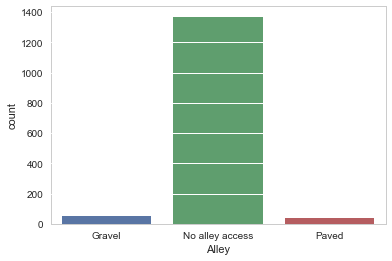

In [113]:
ax = sns.countplot(train.Alley)
ax.set_axisbelow(False)
ax.yaxis.grid(color='w', linestyle='solid')